Chapter 7
# 指数加权移动平均
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader 
import scipy.stats as stats
import pylab

In [2]:
df_price = pandas_datareader.data.DataReader(['sp500'], 
                                       data_source='fred', 
                                       start='08-01-2018', end='08-01-2021')
df_price = df_price.dropna()

In [3]:
daily_log_r = df_price.apply(lambda x: np.log(x) - np.log(x.shift(1)))
daily_log_r = daily_log_r.dropna()

In [4]:
#%% EWMA mean

df_mean_99  = df_price.ewm(alpha=0.01,  adjust=False).mean()
df_mean_975 = df_price.ewm(alpha=0.025, adjust=False).mean()
df_mean_94  = df_price.ewm(alpha=0.06,  adjust=False).mean()

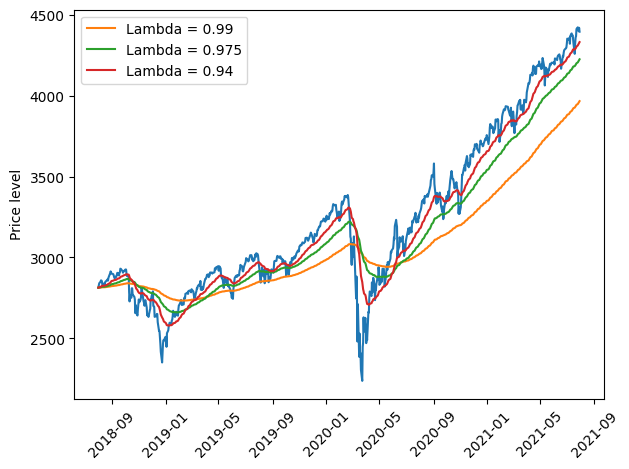

In [5]:
fig, ax = plt.subplots()
# sp500 price
ax.plot(df_price['sp500'])
ax.plot(df_mean_99, label = 'Lambda = 0.99')
ax.plot(df_mean_975,label = 'Lambda = 0.975')
ax.plot(df_mean_94, label = 'Lambda = 0.94')

plt.ylabel('Price level')
plt.legend(loc='upper left')
plt.xticks(rotation = 45) 
# Rotates X-Axis Ticks by 45-degrees
fig.tight_layout()
plt.legend(loc='upper left')

In [6]:
#%% Moving average volatility

MA_vol_50  = daily_log_r.rolling(50).std()
MA_vol_100 = daily_log_r.rolling(100).std()
MA_vol_250 = daily_log_r.rolling(250).std()

In [7]:
#%% EWMA rolling volatility

EWMA_vol_99  = daily_log_r.ewm(alpha=0.01,  adjust=False).std()
EWMA_vol_975 = daily_log_r.ewm(alpha=0.025, adjust=False).std()
EWMA_vol_94  = daily_log_r.ewm(alpha=0.06,  adjust=False).std()

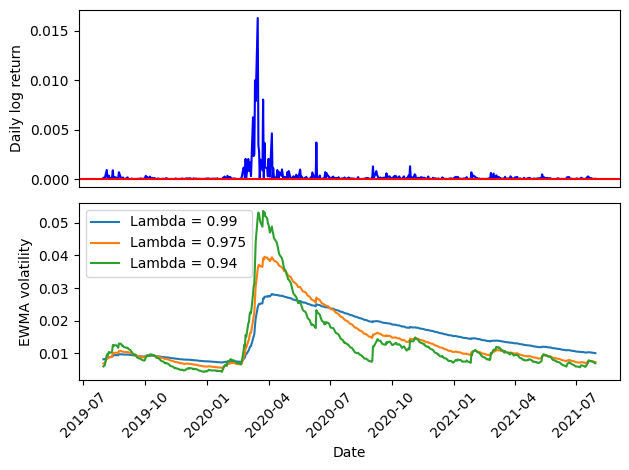

In [8]:
# plot daily log returns
fig, axes = plt.subplots(2,1)
# sp500 daily log returns
axes[0].plot((daily_log_r**2)[MA_vol_250.first_valid_index():MA_vol_250.index[-1]],
             color = 'b')

axes[0].set_xticks([])
axes[0].axhline(y=0, color='r', linestyle='-')
axes[0].set_ylabel('Daily log return')

# Moving average volatility

axes[1].plot(EWMA_vol_99[MA_vol_250.first_valid_index():MA_vol_250.index[-1]], label = 'Lambda = 0.99')
axes[1].plot(EWMA_vol_975[MA_vol_250.first_valid_index():MA_vol_250.index[-1]],label = 'Lambda = 0.975')
axes[1].plot(EWMA_vol_94[MA_vol_250.first_valid_index():MA_vol_250.index[-1]], label = 'Lambda = 0.94')
axes[1].set_xlabel("Date")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
axes[1].set_ylabel("EWMA volatility")
fig.tight_layout() 
plt.legend(loc='upper left')

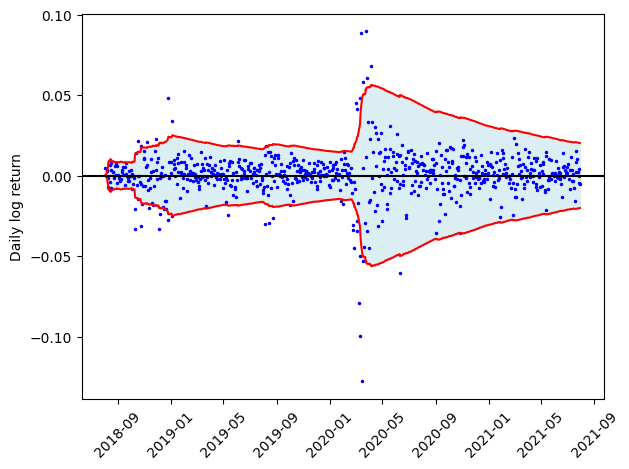

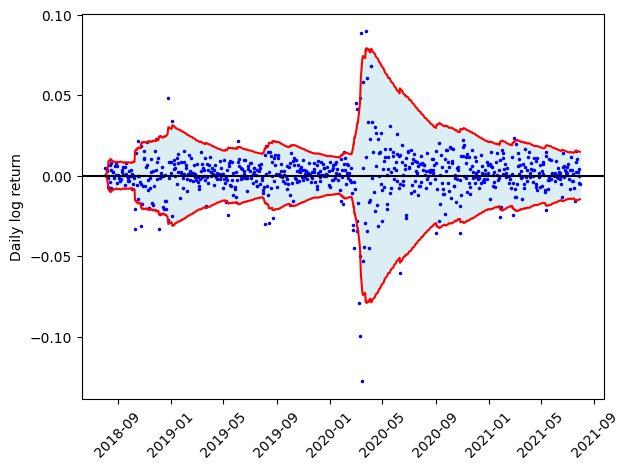

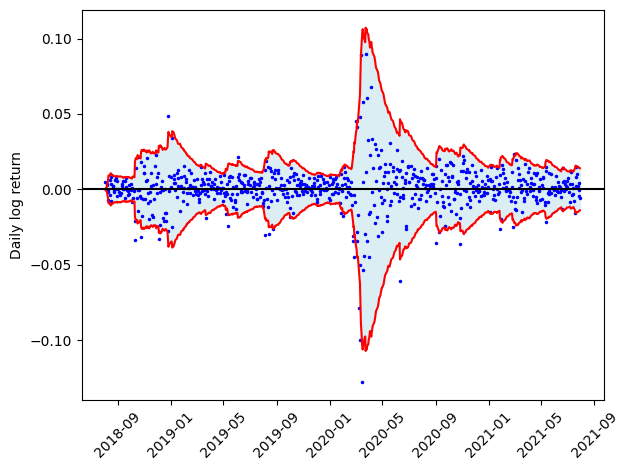

In [9]:
list_df = [EWMA_vol_99, EWMA_vol_975, EWMA_vol_94]

for data in zip(list_df):
    
    data = data[0]
    
    fig, ax = plt.subplots()
    
    # daily return of selected date range
    plt.plot(daily_log_r[data.first_valid_index():data.index[-1]],
                 marker='.', markersize = 3, 
                 color = 'b',linestyle='None')
    
    upper_bound = 2*data[data.first_valid_index():data.index[-1]];
    lower_bound = -upper_bound;
    
    ax.plot(upper_bound, color = 'r')
    ax.plot(lower_bound, color = 'r')
    ax.fill_between(upper_bound.index, upper_bound['sp500'], 
                    lower_bound['sp500'], color = '#DBEEF3')
    ax.axhline(y=0, color='k', linestyle='-')
    
    ax.set_ylabel('Daily log return')
    plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    plt.tight_layout()

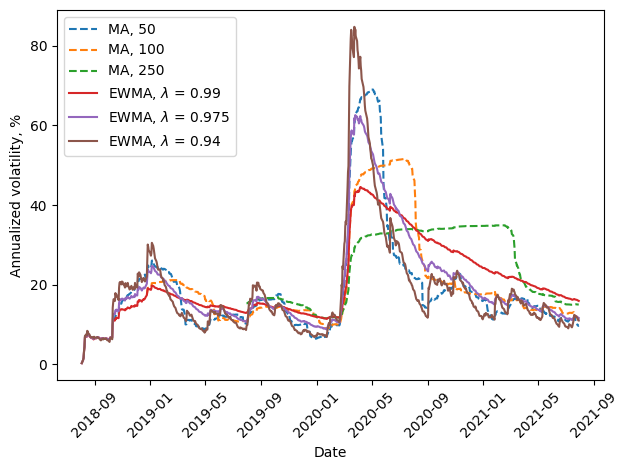

In [10]:
#%% Compare volatilities

fig, ax = plt.subplots()
plt.plot(MA_vol_50*np.sqrt(250)*100,   label = 'MA, 50',  linestyle = '--')
plt.plot(MA_vol_100*np.sqrt(250)*100,  label = 'MA, 100', linestyle = '--')
plt.plot(MA_vol_250*np.sqrt(250)*100,  label = 'MA, 250', linestyle = '--')
plt.plot(EWMA_vol_99*np.sqrt(250)*100, label = 'EWMA, $\lambda$ = 0.99')
plt.plot(EWMA_vol_975*np.sqrt(250)*100,label = 'EWMA, $\lambda$ = 0.975')
plt.plot(EWMA_vol_94*np.sqrt(250)*100, label = 'EWMA, $\lambda$ = 0.94')

ax.set_xlabel("Date")
plt.xticks(rotation = 45) 
# Rotates X-Axis Ticks by 45-degrees
ax.set_ylabel("Annualized volatility, %")
fig.tight_layout() 
plt.legend(loc='upper left')